In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(585, 1000, 3)

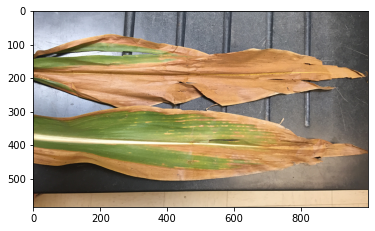

In [22]:
img = cv2.imread('/content/drive/MyDrive/data/Blight/Corn_Blight (1).jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img.shape

In [6]:
DATA_DIR = '/content/drive/MyDrive/data'
CLASSES = os.listdir(DATA_DIR)
NUM_CLASSES = len(CLASSES)
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 10


train_ds = image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=456,               
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    class_names=CLASSES
)

val_ds = image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=456,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    class_names=CLASSES
)

Found 4188 files belonging to 4 classes.
Using 3351 files for training.
Found 4188 files belonging to 4 classes.
Using 837 files for validation.


In [7]:
print(CLASSES)

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']


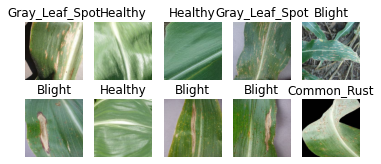

In [11]:
plt.figure()
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(CLASSES[np.argmax(labels[i])])
        plt.axis("off")
plt.show()

In [17]:
model = tf.keras.Sequential()        #model intialized with sequential model

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='linear',input_shape=(224, 224, 3),padding='same'))  #32 filters, 3x3 kernel size  
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))   #Negative slope coefficient=alpha
model.add(tf.keras.layers.MaxPooling2D((2, 2),padding='same'))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))                  
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(tf.keras.layers.Flatten())          

model.add(tf.keras.layers.Dense(128, activation='linear'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))                  
model.add(tf.keras.layers.Dense(len(CLASSES), activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 112, 112, 64)      0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                 

In [18]:
history = model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
210/210 [==============================] - 602s 3s/step - loss: 59.6825 - accuracy: 0.6747 - val_loss: 0.7654 - val_accuracy: 0.8303
Epoch 2/5
210/210 [==============================] - 384s 2s/step - loss: 0.5961 - accuracy: 0.8588 - val_loss: 0.5205 - val_accuracy: 0.8208
Epoch 3/5
210/210 [==============================] - 384s 2s/step - loss: 0.5444 - accuracy: 0.8526 - val_loss: 0.4997 - val_accuracy: 0.8519
Epoch 4/5
210/210 [==============================] - 401s 2s/step - loss: 0.4590 - accuracy: 0.8785 - val_loss: 0.4111 - val_accuracy: 0.8853
Epoch 5/5
210/210 [==============================] - 398s 2s/step - loss: 0.2260 - accuracy: 0.9293 - val_loss: 0.5877 - val_accuracy: 0.8423


In [ ]:
#val_eval = model.evaluate(train_ds, val_ds, verbose=0)
#print('val loss:', val_eval[0])
#print('val accuracy:', val_eval[1])

In [23]:
# accuracy = model.history['accuracy']
# val_accuracy = model.history['val_accuracy']
# loss = model.history['loss']
# val_loss = model.history['val_loss']
# epochs = range(len(accuracy))
# plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
# plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend()
# plt.figure()
# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()
# plt.show()